In [12]:
import pandas as pd
data = pd.read_csv('Real estate.csv')

In [13]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
data = data.drop('No', axis= 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


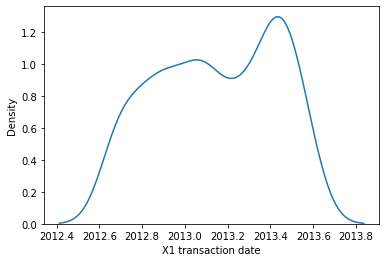

In [15]:
import seaborn as sns
sns.kdeplot(data['X1 transaction date'])

In [16]:
x = data.iloc[:, :6]
y = data.iloc[:, 6]


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
 from matplotlib import pyplot as plt
 from statsmodels import api
 from scipy import stats
 from scipy.optimize import minimize

In [19]:
from scipy.stats import norm
loc, scale = norm.fit(x_train)
print(f"mean is {loc} and standard diviation is {scale}")


mean is 547.8907804934541 and standard diviation is 919.2305546195536


In [20]:
y_train = pd.DataFrame(y_train)

We will maximise the natural logarithm of the likelihood. So, the aim is to find w and σ that will maximise the logarithm.


$logL = -Nln(\sqrt2Πασ)-\frac{1}{2}\sum_{n=0}^N (\frac{x_{n}}{σ})^2
$

$α = \sqrt(\frac{1}{N}\sum_{n=1}^N(\frac{x_{n}}{σ})^2
$

In [21]:
from math import sqrt
alpha = 0
for indices, row in x_train.iterrows():
    for column in x_train.columns:
        alpha += (row[column]/scale)**2
alpha = sqrt(alpha / (len(x_train)*len(x_train.columns)))
print(alpha)

1.1641538068916435


$αX_{n}+σ^2 = Y_{n}$


In [24]:
mean_error = 0
j = -1
for indices, row in x_train.iterrows():
  y_pred = 0
  for column in x_train.columns:
    y_pred += ((row[column]*alpha)+scale)
  j += 1
  mean_error += y_pred
y_target = 0
for indices, row in y_train.iterrows():
  for column in y_train.columns:
    y_target += row[column]
mean_error = abs(y_pred - y_target) / len(x_train)

In [25]:

print(f"mean_error is {mean_error}")

mean_error is 13.343389629718999
